In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [65]:
gold=pd.read_csv("gld.csv")
gold

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [66]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [67]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


<Axes: xlabel='GLD'>

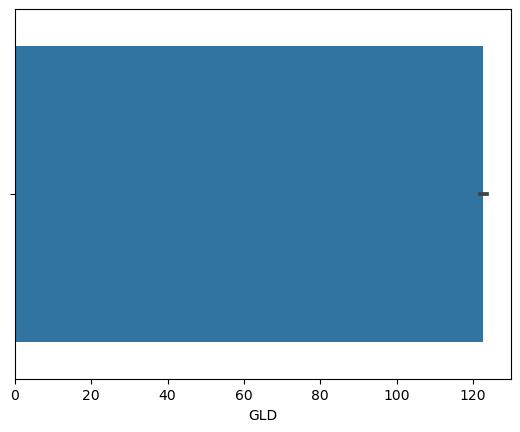

In [68]:
sns.barplot(x='GLD',data=gold)

In [69]:
a=gold.drop("Date",axis=1)

In [70]:
cor=a.corr()
cor

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

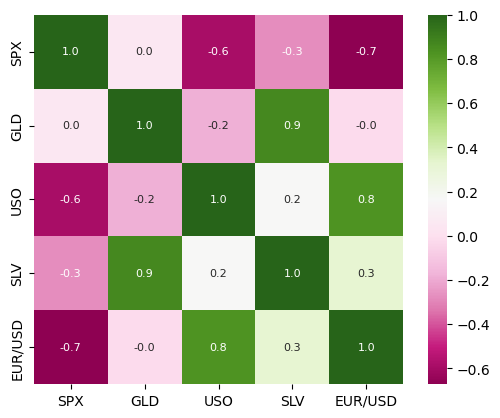

In [71]:
sns.heatmap(cor,square=True,cbar=True,fmt='0.1f',annot=True,annot_kws={'size':8},cmap='PiYG')

In [72]:
x=a.drop("GLD",axis=1)
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [73]:
y=gold["GLD"]
y


0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [74]:
from sklearn.model_selection import train_test_split


In [75]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=1)

In [76]:
from sklearn.ensemble import RandomForestRegressor


In [77]:
model=RandomForestRegressor()

In [78]:
model.fit(xtrain,ytrain)

RandomForestRegressor()

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
model1=LinearRegression()

In [81]:
model1.fit(xtrain,ytrain)

LinearRegression()

In [82]:
x_test_predict=model.predict(xtest)
error_score=metrics.r2_score(x_test_predict,ytest)
error_score

0.9921912812958185

In [83]:
x_train_predict1=model1.predict(xtrain)

In [84]:
error_score=metrics.r2_score(x_train_predict1,ytrain)
error_score

0.8716572882203052

In [85]:
x_test_predict1=model1.predict(xtest)

In [86]:
error_score=metrics.r2_score(x_test_predict1,ytest)
error_score

0.8281026866512371

In [87]:
new_data=(1447.160034,78.470001,15.18,1.471692)
new_data_array=np.asarray(new_data)
new_data_reshape=new_data_array.reshape(1,-1)
prediction=model.predict(new_data_reshape)
prediction

D:\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([85.02089991])

In [88]:
ytest=list(ytest)

In [89]:
ytest

[110.82,
 151.050003,
 137.660004,
 113.07,
 114.629997,
 96.18,
 110.459999,
 95.120003,
 121.25,
 126.800003,
 146.380005,
 122.470001,
 116.629997,
 87.75,
 95.989998,
 92.730003,
 115.690002,
 89.18,
 124.980003,
 115.029999,
 120.739998,
 151.619995,
 122.900002,
 120.260002,
 171.720001,
 109.129997,
 119.529999,
 87.419998,
 88.25,
 90.610001,
 121.309998,
 154.190002,
 151.440002,
 128.229996,
 126.720001,
 90.800003,
 167.320007,
 120.959999,
 105.900002,
 143.809998,
 92.290001,
 127.589996,
 116.75,
 152.149994,
 118.970001,
 89.519997,
 76.199997,
 120.139999,
 131.660004,
 118.989998,
 128.199997,
 165.800003,
 155.669998,
 92.059998,
 147.630005,
 150.75,
 114.290001,
 111.540001,
 87.379997,
 127.959999,
 124.769997,
 151.619995,
 113.639999,
 110.879997,
 161.539993,
 119.779999,
 107.519997,
 129.869995,
 131.679993,
 125.980003,
 115.480003,
 150.410004,
 155.360001,
 168.710007,
 110.739998,
 141.630005,
 102.269997,
 113.75,
 119.290001,
 123.419998,
 118.190002,
 9

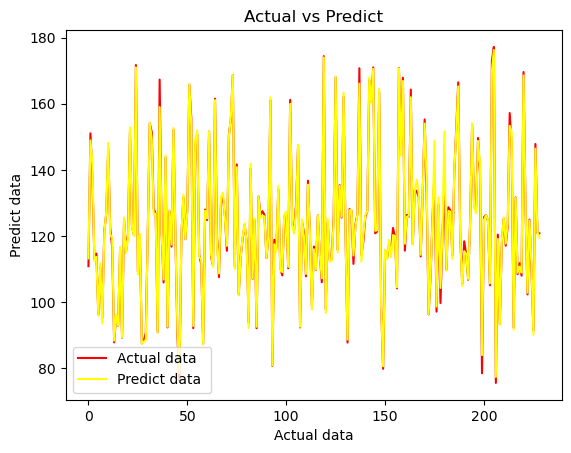

In [105]:
plt.plot(ytest,color="Red",label="Actual data")
plt.plot(x_test_predict,color="yellow",label="Predict data ")
plt.xlabel('Actual data')
plt.ylabel("Predict data")
plt.title("Actual vs Predict")
plt.legend()
plt.show()